In [1]:
import pandas as pd
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Wczytanie danych jako "tablica / macierz"
data = pd.read_csv("Datasets/breast-cancer.csv")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [2]:
data.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [3]:
data.shape

(569, 32)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Target: M - Malignant B - Benign

In [8]:
# Wyrzucenie niepotrzebnej kolumny ID
data.drop('id',axis=1,inplace=True)

In [9]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


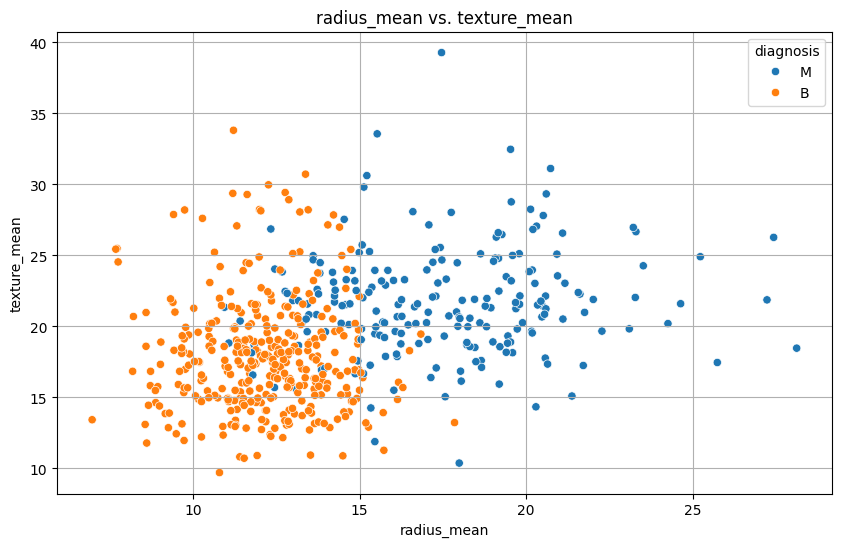

In [11]:
# Wykres 2D_1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=data)
plt.title('radius_mean vs. texture_mean')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.grid(True)
plt.show()

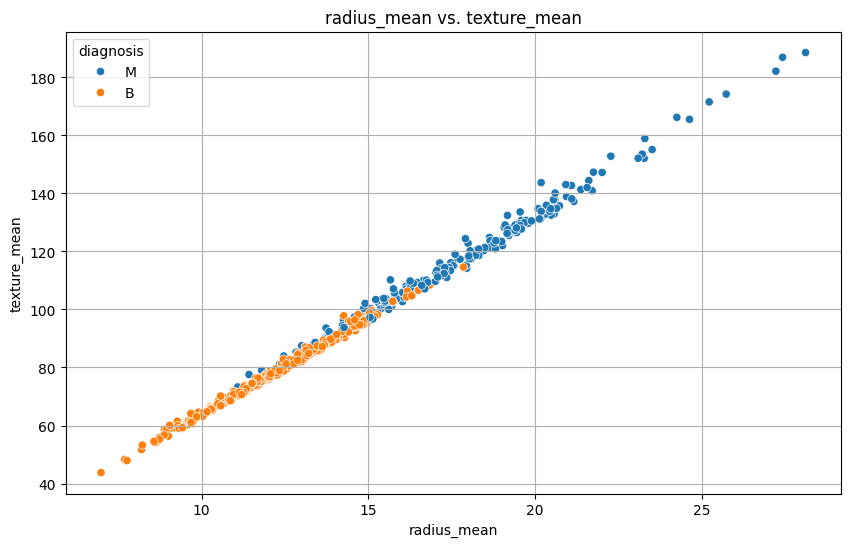

In [12]:
# Wykres 2D_2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='perimeter_mean', hue='diagnosis', data=data)
plt.title('radius_mean vs. texture_mean')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.grid(True)
plt.show()

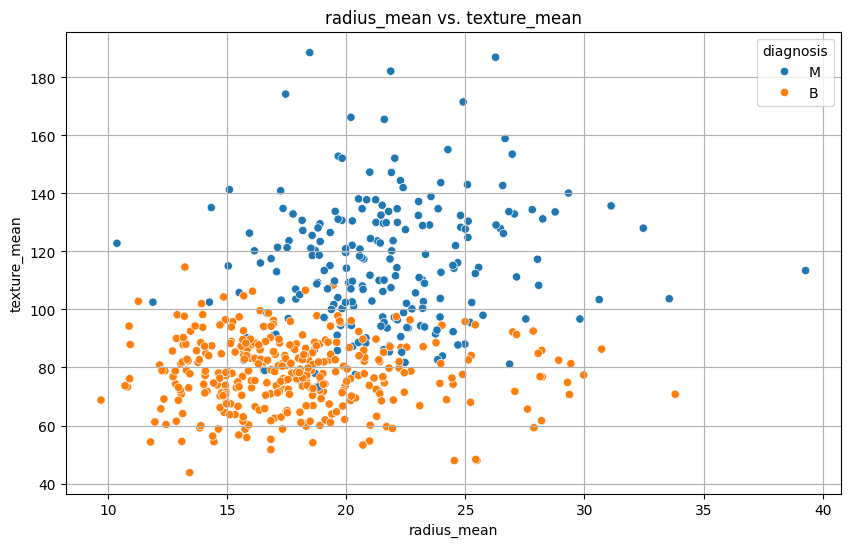

In [13]:
# Wykres 2D_3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='texture_mean', y='perimeter_mean', hue='diagnosis', data=data)
plt.title('radius_mean vs. texture_mean')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

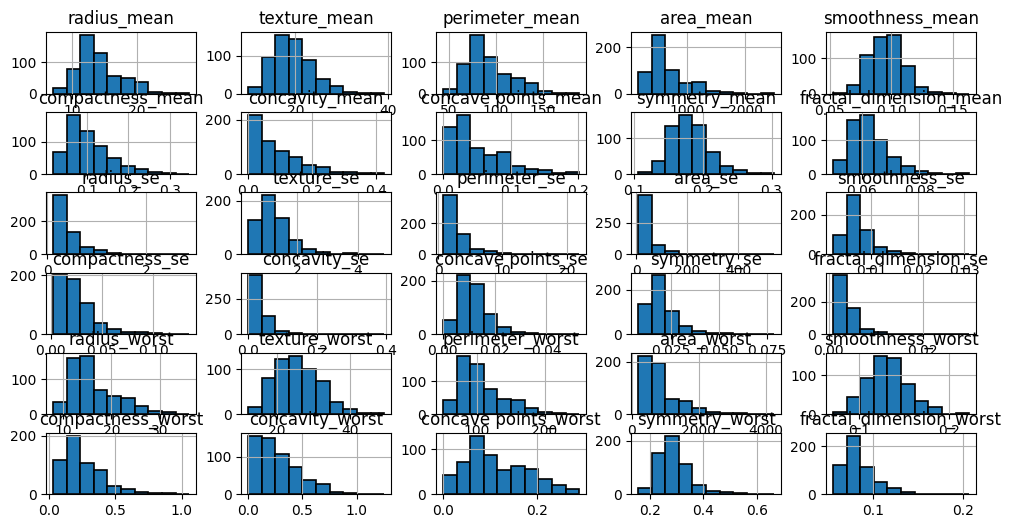

In [14]:
# Rozkład próbek
data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show

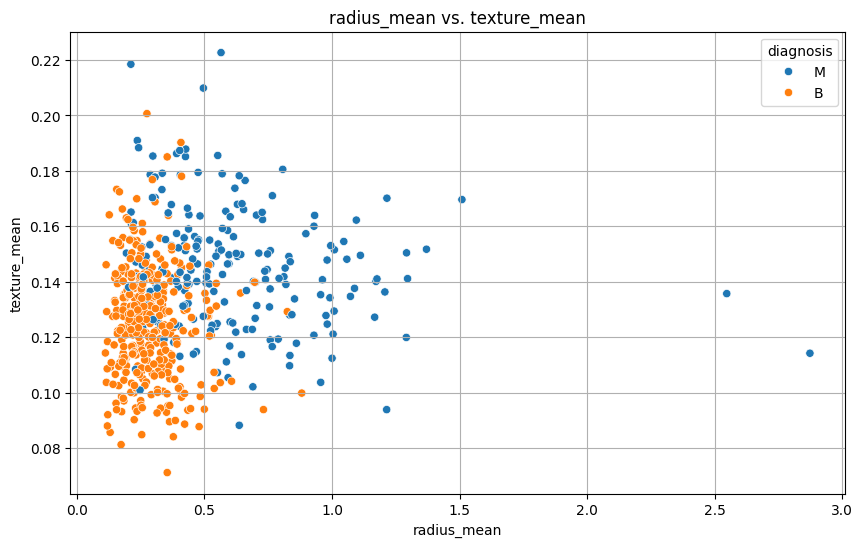

In [15]:
# Wykres 2D_3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_se', y='smoothness_worst', hue='diagnosis', data=data)
plt.title('radius_mean vs. texture_mean')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.grid(True)
plt.show()

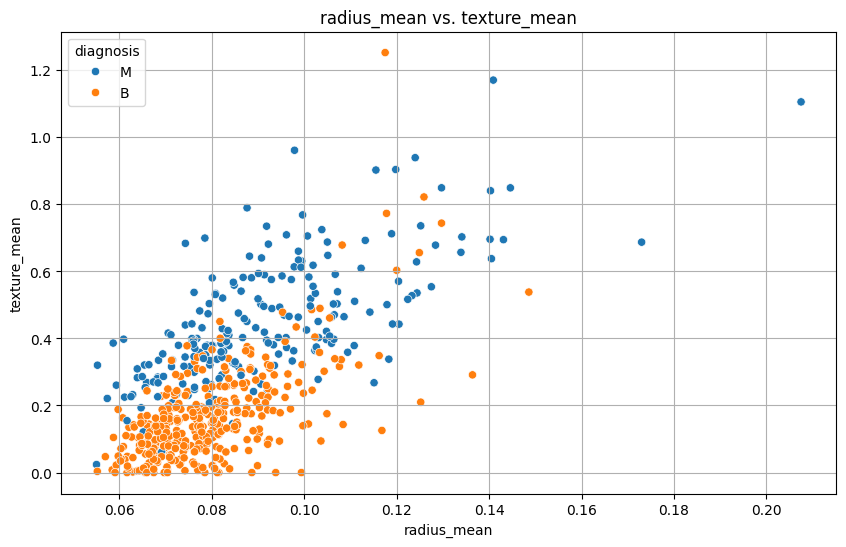

In [16]:
# Wykres 2D_3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fractal_dimension_worst', y='concavity_worst', hue='diagnosis', data=data)
plt.title('radius_mean vs. texture_mean')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.grid(True)
plt.show()

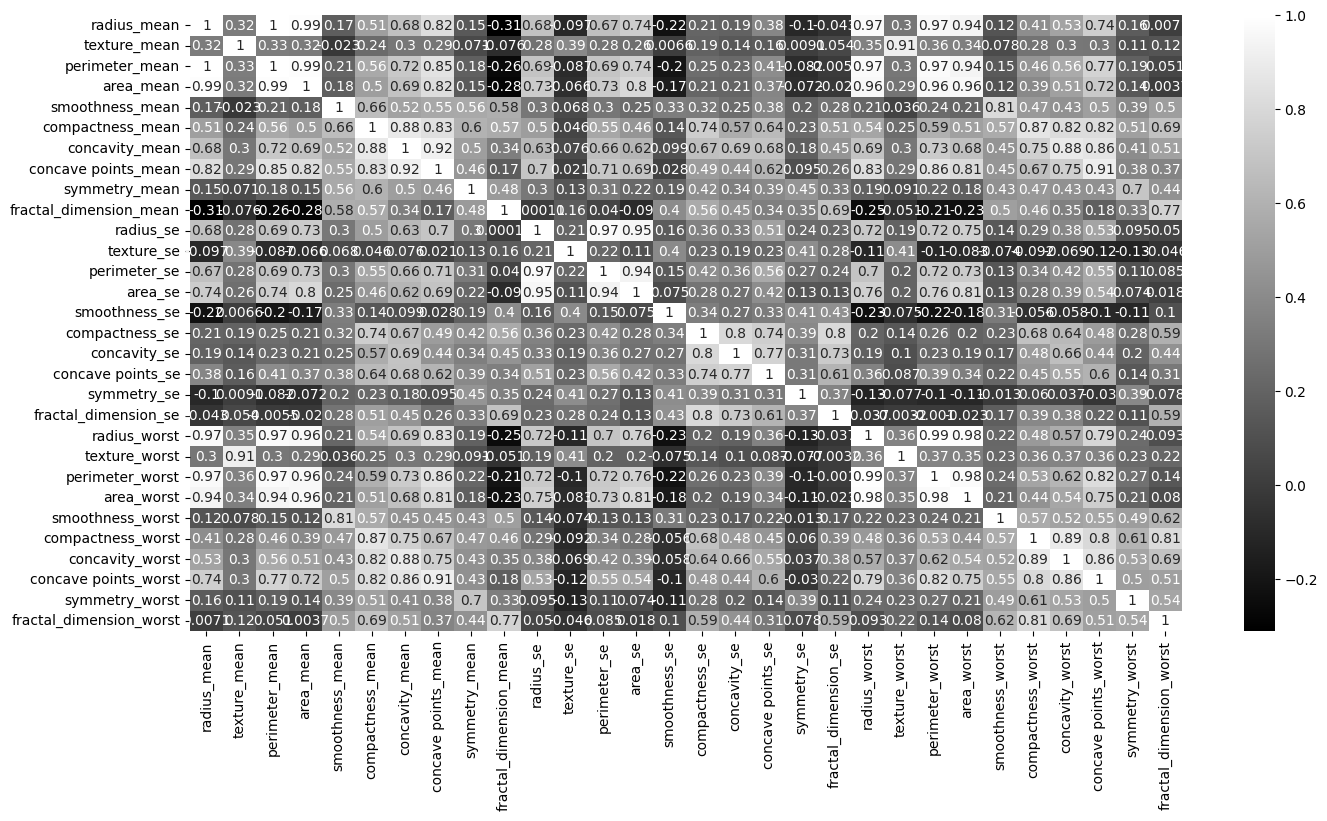

In [17]:
plt.figure(figsize=(16,8)) 
sns.heatmap(data.drop("diagnosis", axis=1).corr(),annot=True,cmap='gray')
plt.show()

In [19]:
import sklearn.model_selection

train, test = sklearn.model_selection.train_test_split(data, test_size=0.3, shuffle=True)

print(train.head(5))
print(train.shape)


    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
165         B        14.97         19.76           95.50      690.2   
16          M        14.68         20.13           94.74      684.5   
25          M        17.14         16.40          116.00      912.7   
302         M        20.09         23.86          134.70     1247.0   
344         B        11.71         15.45           75.03      420.3   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
165          0.08421           0.05352         0.01947              0.01939   
16           0.09867           0.07200         0.07395              0.05259   
25           0.11860           0.22760         0.22290              0.14010   
302          0.10800           0.18380         0.22830              0.12800   
344          0.11500           0.07281         0.04006              0.03250   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
165         0.1515  ...  

In [20]:
train_X = train.drop("diagnosis", axis=1)
train_Y = train["diagnosis"]

test_X = test.drop("diagnosis", axis=1)
test_Y = test["diagnosis"]

In [23]:
from tabulate import tabulate

print(tabulate(test_X.head(5), headers = 'keys', tablefmt = 'psql'))
print(test_X.shape)

print("---------------------------")

print(test_Y.head(5))
print(test_Y.shape)

+-----+---------------+----------------+------------------+-------------+-------------------+--------------------+------------------+-----------------------+-----------------+--------------------------+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+
|     |   radius_mean |   texture_mean |   perimeter_mean |   area_mean |   smoothness_mean |   compactness_mean |   concavity_mean |   concave points_mean |   symmetry_mean |   fractal_dimension_mean |   radius_se |   texture_se |   perimeter_se |   area_se |   smoothness_se |   compactness_se |   concavity_se |   concave points_se |   symmetry_se |   fractal_dimension_se |   radius_worst |   texture_worst |   pe

In [24]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

from sklearn import metrics #for checking the model accuracy

In [25]:
# Logistic Regression

model = LogisticRegression()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.9298245614035088


c:\Users\wojciech.janik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Support Vector Machine (classification)

model = svm.SVC() 
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction,test_Y))

The accuracy of the SVM is: 0.8771929824561403


In [30]:
# KNN

model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction,test_Y))

The accuracy of the KNN is 0.8947368421052632


In [28]:
# Decision tree

model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is 0.9473684210526315


<Axes: >

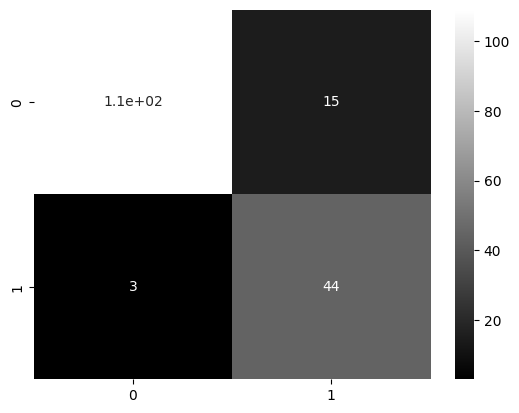

In [31]:
confusion_matrix = metrics.confusion_matrix(prediction, test_Y)
sns.heatmap(confusion_matrix, cmap="gray", annot=True)

<Axes: >

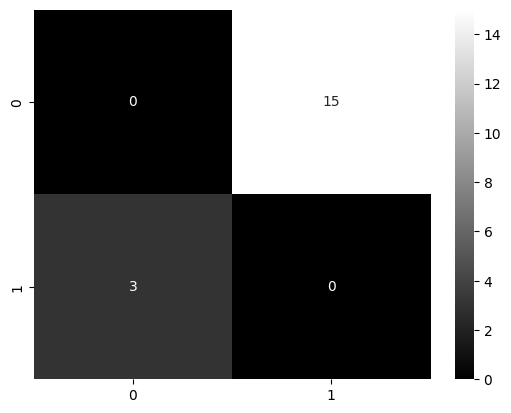

In [32]:
np.fill_diagonal(confusion_matrix, 0)
sns.heatmap(confusion_matrix, cmap="gray", annot=True)

In [33]:
print(f"Wynik precyzji dla modelu to {metrics.precision_score(prediction, test_Y, average=None)}")
print(f"Wynik pełnośi dla modelu to {metrics.recall_score(prediction, test_Y, average=None)}")
print(f"Wynik pełnośif1 dla modelu to {metrics.f1_score(prediction, test_Y, average=None)}")

Wynik precyzji dla modelu to [0.97321429 0.74576271]
Wynik pełnośi dla modelu to [0.87903226 0.93617021]
Wynik pełnośi dla modelu to [0.92372881 0.83018868]
